<a href="https://colab.research.google.com/github/husseing/A.I-JORDAN/blob/master/Jordan1_13_ONLY_Group_44_AIR_Jordan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AIR Jordan Classifier Project:

The dataset used is one from kaggle and can be found at the following link:   [https://www.kaggle.com/shreykavi/air-jordans-retro-121?select=21](https://)

The dataset is in a zip file format with each type of Jordan in its own folder. The zip file has been uploaded onto our google drive and will be loaded into colab from there.

This file is for Jordan classification between 1-13. The dataset has much more data points from 1-13 in comparison to 13+.

Data Loading:

In [1]:
import time
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!unzip '/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/AJ DATA(13).zip' -d '/root/datasets'

Streaming output truncated to the last 5000 lines.
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_14.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_15.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_16.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_17.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_18.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_19.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_2.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_20.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_3.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_4.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_5.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_6.jpg  
  inflating: /root/datasets/2/2/Air-Jordan-2-Retro-Low-Gym-Red_7.jpg  
  inflating: /root/

In [4]:
# define training and test data directories
data_dir = '/root/datasets'

# classes are folders in each directory with these names
classes = ['1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
# load and transform data using ImageFolder

# resize all images to 600 x 600
#data_transform = transforms.Compose([transforms.RandomResizedCrop(600), 
                                      #transforms.ToTensor()])
#data_transform = transforms.Compose([transforms.CenterCrop(224), 
                                      #transforms.ToTensor()])
data_transform = transforms.Compose([transforms.Resize((600,600),interpolation=2),
                                           transforms.ToTensor()])


dataset = datasets.ImageFolder(data_dir, transform=data_transform)

# print out some data stats
print('Num images: ', len(dataset))


'''#Trying to only use working images. Didnt work for RAM reasons. Fuck
workinglist=[]
notworkinglist=[]
workingdata=[]
z=0
for i in range(len(dataset)):
    try:
        workinglist.append((i,dataset[i][1]))
        workingdata.append(dataset[i])
    except:
        notworkinglist.append(i)
        pass
        z+=1'''


# Prepare Dataloader
batch_size = 32
num_workers = 1
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)


Num images:  8518


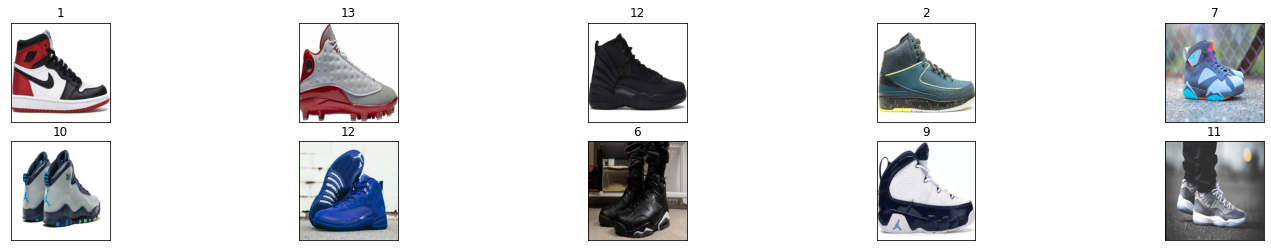

In [ ]:
# Verification Step - obtain one batch of images and visualize


dataiter = iter(data_loader)
#Following while loop and try catch is so that the iterator keeps repeating until
#it finds a combo of 10 images that don't raise an error
z=0
while z<1:
  try:
      images, labels = dataiter.next()
      images = images.numpy() # convert images to numpy for display
      z+=1
  except:
      pass

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
      ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      ax.set_title(classes[labels[idx]])

#IMPORTANT NOTE
#THE ABOVE DOES NOT SPLIT THE DATA
#Labels are wrong on the shoes....

Quick Note: Based on the above images, there is gonna have to be some pre-processing where we center the shoe somehow. 400 x 400 size seemed too small as there was a lot of shoes being cut out. 600 x 600 seems reasonable but there are definitely images that are smaller

In [ ]:
#it looks like it fails in multiple places
#Fails on the 51st image, when I went to the dataset on our drive, this images preview wasnt on there
#Seems like it may be an issue where some images from the dataset are corrupted or just not being loaded right
#Tried both the zip file and the folders in the drive and both give this error at the same point which starts at shoe 50
for idx, (data, image) in enumerate(dataset): 
    print(idx)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


UnidentifiedImageError: ignored

In [ ]:
#z is the number of images that dont work,
#length of workinglist is the number of images that do
workinglist=[]
notworkinglist=[]
z=0
for i in range(len(dataset)):
    try:
        workinglist.append((i,dataset[i][1]))
        #workinglist.append(dataset[i])
    except:
        notworkinglist.append(i)
        pass
        z+=1

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
#First index matches where we know it falls apart first
print(z)
print(len(notworkinglist))
print(notworkinglist)

641
641
[51, 53, 57, 59, 61, 63, 65, 66, 68, 71, 73, 75, 79, 81, 83, 88, 95, 100, 103, 122, 132, 134, 149, 167, 188, 191, 199, 201, 203, 218, 220, 224, 226, 227, 241, 310, 332, 347, 351, 359, 361, 363, 365, 367, 411, 418, 423, 431, 435, 437, 442, 444, 446, 448, 457, 459, 496, 527, 529, 588, 593, 599, 631, 633, 640, 642, 669, 707, 709, 711, 713, 719, 721, 734, 784, 789, 790, 792, 794, 823, 825, 831, 851, 878, 880, 882, 887, 891, 893, 895, 902, 916, 960, 966, 974, 1014, 1016, 1020, 1024, 1026, 1036, 1040, 1042, 1069, 1071, 1075, 1088, 1091, 1106, 1108, 1110, 1112, 1117, 1119, 1154, 1157, 1163, 1167, 1180, 1181, 1219, 1234, 1237, 1240, 1242, 1246, 1277, 1286, 1290, 1292, 1293, 1303, 1305, 1307, 1353, 1427, 1470, 1484, 1503, 1506, 1509, 1530, 1532, 1543, 1553, 1555, 1559, 1561, 1563, 1566, 1573, 1617, 1621, 1630, 1634, 1636, 1638, 1643, 1648, 1676, 1834, 1912, 1914, 1916, 1918, 1921, 1924, 1980, 1982, 1984, 1989, 1995, 1998, 2007, 2009, 2044, 2056, 2058, 2084, 2122, 2141, 2144, 2146, 2148,

In [ ]:
print(len(workinglist))
print(workinglist)

9371
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (52, 0), (54, 0), (55, 0), (56, 0), (58, 0), (60, 0), (62, 0), (64, 0), (67, 0), (69, 0), (70, 0), (72, 0), (74, 0), (76, 0), (77, 0), (78, 0), (80, 0), (82, 0), (84, 0), (85, 0), (86, 0), (87, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (96, 0), (97, 0), (98, 0), (99, 0), (101, 0), (102, 0), (104, 0), (105, 0), (106, 0), (107, 0), (108, 0), (109, 0), (110, 0), (111, 0), (112, 0), (113, 0), (114, 0), (115, 0), (116, 0), (117, 0), (118, 0), (119, 0), (120, 0), (121, 0), (123, 0), (124, 0), (125, 0), (126, 0), (127, 0), (128, 0

There are 641 images that raise UnidentifiedImage Errors while 9371 of them do not. Only 6.4% of the dataset is unusable.

Data Splitting:

In [6]:
#Returns a list of indices that correspond to the images that don't
#throw UnidentifiedImage Errors
def get_working_indices(dataset):
    indices = []
    workinglist=[]
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        try:
          workinglist.append((i,dataset[i][1]))
          indices.append(i)
        except:
          pass
    return indices

In [7]:
indices1=get_working_indices(dataset)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [8]:
len(indices1)

7968

In [9]:
from torch.utils.data.sampler import SubsetRandomSampler 
#By using get_working_indices, the data loaders only contain working images that
#don't throw UnidentifiedImage Errors
def splitdata(ImageFolder, batch_size):
  #Split into train and validation and test
  np.random.seed(1000)
  #Got rid of the below line and hardcodes/ put it as local variable as it took
  #way too long to split data because of it
  #indices= get_working_indices(ImageFolder)
  length= len(indices1)
  np.random.shuffle(indices1)


  split1 = int(length * 0.7) #split at 70% for training
  split2 = int(length * 0.85) #Second split so each of val and test have 15%

  train_idx, valid_idx, test_idx = indices1[:split1], indices1[split1:split2], indices1[split2:]

  train_sampler = SubsetRandomSampler(train_idx)
  valid_sampler = SubsetRandomSampler(valid_idx)
  test_sampler = SubsetRandomSampler(test_idx)

  #Putting into dataloaders
  train_loader = torch.utils.data.DataLoader(ImageFolder, batch_size=batch_size,
                                          num_workers=1, sampler= train_sampler)
  val_loader = torch.utils.data.DataLoader(ImageFolder, batch_size=batch_size,
                                          num_workers=1, sampler= valid_sampler)
  test_loader = torch.utils.data.DataLoader(ImageFolder, batch_size=batch_size,
                                          num_workers=1, sampler= test_sampler)
  
  return train_loader, val_loader, test_loader

In [10]:
#Makes sense given batch size of 32
train_loader, val_loader, test_loader = splitdata(dataset, 32)
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

175
38
38


In [ ]:
train_loader8, val_loader8, test_loader8 = splitdata(dataset, 8)
print(len(train_loader8))
print(len(val_loader8))
print(len(test_loader8))

698
150
150


In [ ]:
train_loader128, val_loader128, test_loader128 = splitdata(dataset, 128)
print(len(train_loader128))
print(len(val_loader128))
print(len(test_loader128))

44
10
10


In [11]:
train_loader16, val_loader16, test_loader16 = splitdata(dataset, 16)
print(len(train_loader16))
print(len(val_loader16))
print(len(test_loader16))

349
75
75


In [20]:
train_loader1, val_loader1, test_loader1 = splitdata(dataset, 1)
print(len(train_loader1))
print(len(val_loader1))
print(len(test_loader1))

5577
1195
1196


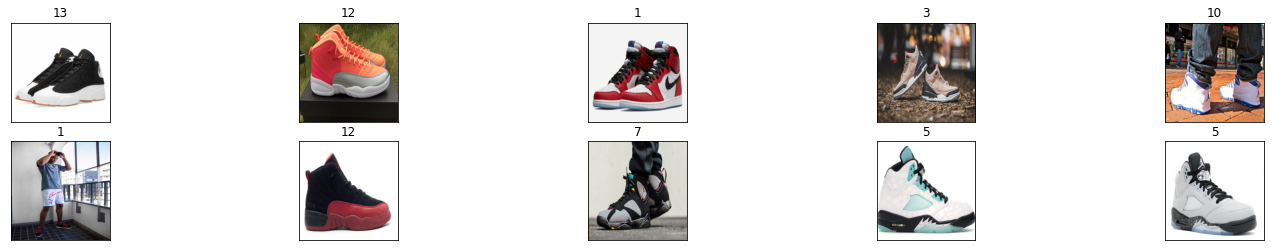

In [ ]:
dataiter = iter(train_loader)

images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
      ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      ax.set_title(classes[labels[idx]])

In [ ]:
#Not using AlexNet currently
#AlexNet Implementation
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent

# alexnet
import torchvision.models

torch.manual_seed(1) # set the random seed


# obtain one batch of training images
dataiter = iter(train_loader8)
images, labels = dataiter.next()

# confirm output from AlexNet feature extraction
alexNet = torchvision.models.alexnet(pretrained=True)
features = alexNet.features(images)
features.shape

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


torch.Size([8, 256, 17, 17])

### Model Building:
Using a CNN: Build a convolutional neural network model that takes the (600x600 RGB) image as input, and predicts the Jordan Model. 

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

torch.manual_seed(1) # set the random seed

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.name = "Class"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(216090, 50)
        self.fc2 = nn.Linear(50, 13)

    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = self.pool(F.relu(self.conv2(x)))
        #print('x_shape:',x.shape)
        x = x.view(-1, 216090)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
#ADDING MORE LINEAR LAYERS TO THE ABOVE (OG) ARCHITECTURE
#Ran out of memory and CUDA when added more than 3 layers
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

torch.manual_seed(1) # set the random seed

class XtraCNNClassifier(nn.Module):
    def __init__(self):
        super(XtraCNNClassifier, self).__init__()
        self.name = "Class"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(216090, 500)
        self.fc2 = nn.Linear(500, 50)
        self.fc3 = nn.Linear(50, 13)

    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = self.pool(F.relu(self.conv2(x)))
        #print('x_shape:',x.shape)
        x = x.view(-1, 216090)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [13]:
Michael= CNNClassifier()

In [ ]:
Mike= XtraCNNClassifier()

Training Code:

In [14]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:

       #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
      
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [15]:
def train(model, train_loader, val_loader, num_epochs=5, learn_rate = 0.001):

    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    iters, train_acc, val_acc = [], [], []

    # training
    print ("Training Started...")
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):


           #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1
        
        # track accuracy
        iters.append(n)
        train_acc.append(get_accuracy(model, train_loader))
        val_acc.append(get_accuracy(model, val_loader))
        print(epoch, train_acc[-1], val_acc[-1])
    end_time= time.time()
    
    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")    
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()        
    return train_acc, val_acc

Training Results:

Below are some of the results and plots of training with a combination of the two classifiers and multiple batch sizes. The rest of the hyperparameter exploration for tuning was done on a separate colab file in order not to overcrowd this main one.

CUDA is available!  Training on GPU ...
Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.534158149542765 0.29121338912133893


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.863905325443787 0.3581589958158996


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.9772279003048234 0.399163179916318


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.9849381387842926 0.3891213389121339


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.9931863008786086 0.4125523012552301


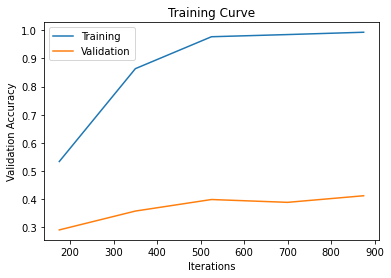

([0.534158149542765,
  0.863905325443787,
  0.9772279003048234,
  0.9849381387842926,
  0.9931863008786086],
 [0.29121338912133893,
  0.3581589958158996,
  0.399163179916318,
  0.3891213389121339,
  0.4125523012552301])

In [ ]:
#BATCH SIZE 32, Learning rate 0.0025
use_cuda = True
Michael= CNNClassifier()
#ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Michael.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
train(Michael, train_loader, val_loader, num_epochs=5, learn_rate=0.0025)

CUDA is available!  Training on GPU ...
Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.08965393580778196 0.10125523012552301


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.549757934373319 0.2644351464435146


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.8764568764568764 0.35899581589958157


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.9648556571633494 0.3581589958158996


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.9822485207100592 0.37740585774058577


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5 0.9869105253720638 0.3782426778242678


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


6 0.9858346781423705 0.36485355648535567


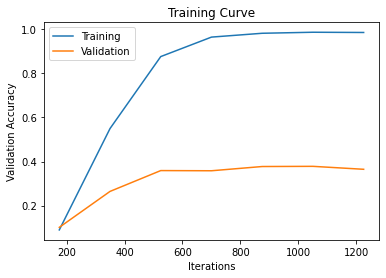

([0.08965393580778196,
  0.549757934373319,
  0.8764568764568764,
  0.9648556571633494,
  0.9822485207100592,
  0.9869105253720638,
  0.9858346781423705],
 [0.10125523012552301,
  0.2644351464435146,
  0.35899581589958157,
  0.3581589958158996,
  0.37740585774058577,
  0.3782426778242678,
  0.36485355648535567])

In [17]:
#BATCH SIZE 32, Learning rate 0.0025
use_cuda = True
Michael= CNNClassifier()
#ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Michael.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
train(Michael, train_loader, val_loader, num_epochs=7, learn_rate=0.0025)

In [ ]:
#Saving weights of Michael trained on a batch size of 32 and learning rate 0.0025
checkpoint = {'model': CNNClassifier(),
          'state_dict': Michael.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type CNNClassifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
#RUN THIS TO GET TRAINED MODEL
#Loads Michael model with trained parameters
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    Michael = checkpoint['model']
    Michael.load_state_dict(checkpoint['state_dict'])
    for parameter in Michael.parameters():
        parameter.requires_grad = False

    Michael.eval()
    return Michael

Michael = load_checkpoint('checkpoint.pth')

FileNotFoundError: ignored

CUDA is available!  Training on GPU ...
Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.328133405056482 0.21171548117154812


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.6715079792002869 0.32719665271966525


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.8565537027075488 0.35397489539748955


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.9130356822664515 0.37405857740585774


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.9282768513537745 0.37154811715481173


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5 0.9589384974000359 0.3732217573221757


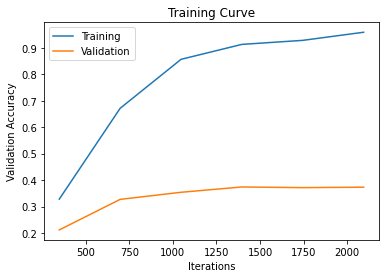

([0.328133405056482,
  0.6715079792002869,
  0.8565537027075488,
  0.9130356822664515,
  0.9282768513537745,
  0.9589384974000359],
 [0.21171548117154812,
  0.32719665271966525,
  0.35397489539748955,
  0.37405857740585774,
  0.37154811715481173,
  0.3732217573221757])

In [32]:
#BATCH SIZE 16, Learning rate 0.0025
use_cuda = True
Michael16= CNNClassifier()
#ALNC = alexNet.features 

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Michael16.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(Michael16, train_loader16, val_loader16, num_epochs=6, learn_rate=0.0025)

In [ ]:
#BATCH SIZE 16, Learning rate 0.0025
use_cuda = True
Mike= XtraCNNClassifier()
#ALNC = alexNet.features 

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Mike.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(Mike, train_loader16, val_loader16, num_epochs=5, learn_rate=0.0025)

CUDA is available!  Training on GPU ...
Training Started...


KeyboardInterrupt: ignored

In [ ]:
#BATCH SIZE 16, Learning rate 0.0025
use_cuda = True
Mike= XtraCNNClassifier()
#ALNC = alexNet.features 

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Mike.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(Mike, train_loader, val_loader, num_epochs=7, learn_rate=0.0025)
#Stopped at 5 epochs as it wasnt improving

CUDA is available!  Training on GPU ...
Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.08176438945669715 0.09790794979079498


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.08176438945669715 0.09790794979079498


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.08373677604446836 0.07280334728033473


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.0844540075309306 0.09288702928870293


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.0844540075309306 0.09288702928870293


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


KeyboardInterrupt: ignored

CUDA is available!  Training on GPU ...
Training Started...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.798749809422168 0.7226173541963016


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.8464704985516085 0.7240398293029872


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.9333739899374904 0.7162162162162162


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.9716420186003965 0.7083926031294452


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.986888245159323 0.7147937411095305


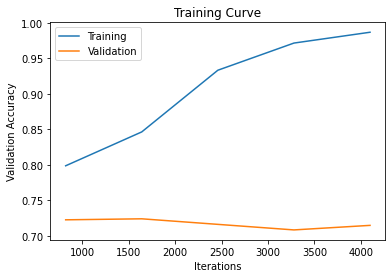

([0.798749809422168,
  0.8464704985516085,
  0.9333739899374904,
  0.9716420186003965,
  0.986888245159323],
 [0.7226173541963016,
  0.7240398293029872,
  0.7162162162162162,
  0.7083926031294452,
  0.7147937411095305])

In [ ]:
#BATCH SIZE 8, Learning rate 0.00025
use_cuda = True
Michael= CNNClassifier()
#ALNC = alexNet.features 

if use_cuda and torch.cuda.is_available():
  #ALNC.cuda()
  Michael.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model

train(Michael, train_loader8, val_loader8, num_epochs=5, learn_rate=0.00025)

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

### Seeing how the model performs on the testset:

In [34]:
print("The Michael model has a test accuracy of", get_accuracy(Michael,test_loader), "on the testset with a batch size of 32")

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


The Michael model has a test accuracy of 0.3745819397993311 on the testset with a batch size of 32


In [35]:
print("The Michael model has a test accuracy of", get_accuracy(Michael,test_loader1), "on the testset with a batch size of 1")

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


The Michael model has a test accuracy of 0.8051839464882943 on the testset with a batch size of 1


In [33]:
print("The Michael16 model (trained with batch size 16 rather than 32) has a test accuracy of", get_accuracy(Michael16,test_loader16), "on the testset with a batch size of 16")
print("The Michael16 model (trained with batch size 16 rather than 32) has a test accuracy of", get_accuracy(Michael16,test_loader1), "on the testset with a batch size of 1")

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


The Michael16 model (trained with batch size 16 rather than 32) has a test accuracy of 0.38461538461538464 on the testset with a batch size of 16


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


The Michael16 model (trained with batch size 16 rather than 32) has a test accuracy of 0.8043478260869565 on the testset with a batch size of 1


Troubleshooting:
Trying to find the reason, the Michael classifier is overtraining to the training set. 

Also seeing which ones the model is getting wrong.

In [23]:
#ALTERING THE get_accuracy FUNCTION TO BE ABLE TO PRINT IMAGES INCORRECTLY CLASSIFIED

def get_accuracy2(model, data_loader):
    correct = 0
    total = 0
    wrongly_classified=[]
    rightly_classified=[]
    for imgs, labels in data_loader:
        runningt=correct

       #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        for i in range(len(pred)):
          if (pred[i].reshape((-1,)) != labels[i]):
            wrongly_classified.append([imgs[i], labels[i]])
          if (pred[i].reshape((-1,)) == labels[i]):
            rightly_classified.append([imgs[i], labels[i]])
    
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
        ###############NEW ADDITION############

    #wrong_loader = torch.utils.data.DataLoader(wrongly_classified, batch_size=32, 
     #                                      num_workers=1, shuffle=True)


    return [(correct / total), wrongly_classified, rightly_classified]

In [26]:
#Model used was Michael trained with BATCH SIZE 32, Learning rate 0.0025
[acc,wrong,right] = get_accuracy2(Michael.cuda(), val_loader1)
print("Michael Val accuracy:", acc)
print("Wrongly classified:", len(wrong))
print("Rightly classified:", len(right))

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Michael Val accuracy: 0.7882845188284519
Wrongly classified: 253
Rightly classified: 942


In [27]:
wrong_loader= torch.utils.data.DataLoader(wrong, batch_size=32, 
                                           num_workers=0, shuffle=True)
right_loader= torch.utils.data.DataLoader(right, batch_size=32, 
                                           num_workers=0, shuffle=True)

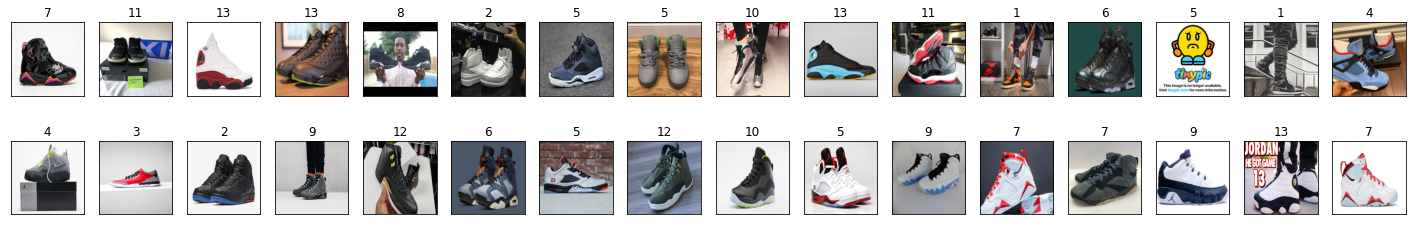

In [30]:
#ONES THAT MICHAEL GETS WRONG
#doesnt work with batch size of 1 but worked with 32. No biggie
wrongiter = iter(wrong_loader)
images, labels = wrongiter.next()
images = images.cpu().numpy() # convert images to numpy for display
images = np.squeeze(images)
#print(images[1])
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(32):
      ax = fig.add_subplot(2, 32/2, idx+1, xticks=[], yticks=[])
      #images[idx] = images[0, :,:,:].transpose(1,2,0)
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      #plt.imshow(images[idx])
      ax.set_title(classes[labels[idx]])

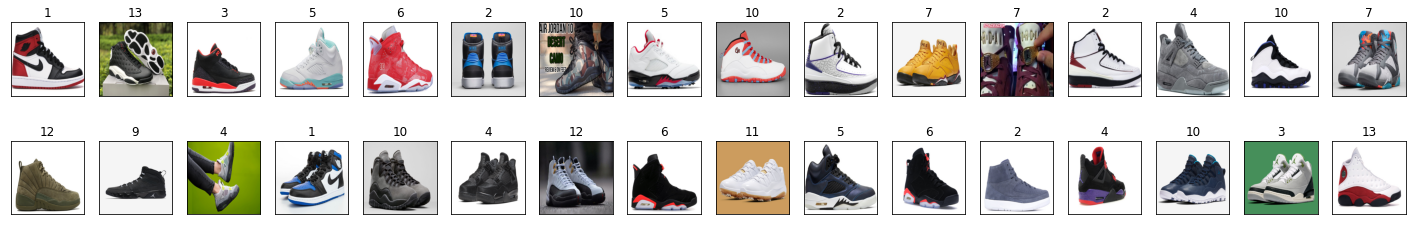

In [31]:
#ONES THAT MICHAEL GETS RIGHT
#doesnt work with batch size of 1 but worked with 32. No biggie
rightiter = iter(right_loader)
images, labels = rightiter.next()
images = images.cpu().numpy() # convert images to numpy for display
images = np.squeeze(images)
#print(images[1])
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(32):
      ax = fig.add_subplot(2, 32/2, idx+1, xticks=[], yticks=[])
      #images[idx] = images[0, :,:,:].transpose(1,2,0)
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      #plt.imshow(images[idx])
      ax.set_title(classes[labels[idx]])

## Testing on never seen before data:

One of our group members searched the internet for 30 different shoes all being Jordans between 1-13. These are shoes our model has not seen before.

In [ ]:
!unzip '/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/TestJordan113.zip' -d '/root/testset/'

Archive:  /content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/TestJordan113.zip
   creating: /root/testset/TestJordans/
  inflating: /root/testset/TestJordans/AJ9.jpg  
   creating: /root/testset/__MACOSX/
   creating: /root/testset/__MACOSX/TestJordans/
  inflating: /root/testset/__MACOSX/TestJordans/._AJ9.jpg  
  inflating: /root/testset/TestJordans/AJ10(2).jpeg  
  inflating: /root/testset/__MACOSX/TestJordans/._AJ10(2).jpeg  
  inflating: /root/testset/TestJordans/AJ13.jpeg  
  inflating: /root/testset/__MACOSX/TestJordans/._AJ13.jpeg  
  inflating: /root/testset/TestJordans/AJ12.jpeg  
  inflating: /root/testset/__MACOSX/TestJordans/._AJ12.jpeg  
  inflating: /root/testset/TestJordans/.DS_Store  
  inflating: /root/testset/__MACOSX/TestJordans/._.DS_Store  
  inflating: /root/testset/TestJordans/AJ6(2).jpeg  
  inflating: /root/testset/__MACOSX/TestJordans/._AJ6(2).jpeg  
  inflating: /root/testset/TestJordans/AJ11(2).jpeg  
  inflating: /root/testset/__MACOSX/TestJordans

In [ ]:
test_dir = '/root/testset'
testset = datasets.ImageFolder(test_dir, transform=data_transform)
print('Num images: ', len(testset))

Num images:  60


In [ ]:
indices3=get_working_indices(testset)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
print(indices3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
workingtestset=[]
for i in indices3:
  workingtestset.append(testset[i])

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
for imgs, labels in iter(workingtestset):
#To Enable GPU Usage
  if use_cuda and torch.cuda.is_available():
    imgs = imgs.cuda()
    #labels = labels.cuda()

In [ ]:
def what_jordan(Resized_Tensor, model):
  #output = model(Resized_Tensor)
  Resized_Tensor = np.squeeze(Resized_Tensor)
  '''
  if torch.cuda.is_available():
    model=model.cuda()
    Resised_Tensor= Resized_Tensor.cuda()
  '''
  #print(Resized_Tensor.shape)
  output = model(Resized_Tensor[None, ...])
  #print(output)

  #select index with maximum prediction score
  #add 1 because list index starts from 0 while Jordans start from 1
  pred = output.max(1, keepdim=True)[1]
  if pred==0:
    pred=1
  elif pred==1:
    pred=10
  elif pred==2:
    pred=11
  elif pred==3:
    pred=12
  elif pred==4:
    pred=13
  elif pred==5:
    pred=2
  elif pred==6:
    pred=3
  elif pred==7:
    pred=4
  elif pred==8:
    pred=5
  elif pred==9:
    pred=6
  elif pred==10:
    pred=7
  elif pred==11:
    pred=8
  elif pred==12:
    pred=9
  #print(pred)
  return pred

In [ ]:
Michaelcpu= Michael.cpu()
predictions=[]
for i in range(len(workingtestset)):
  #workingtestset[i][0]= (workingtestset[i][0]).cuda()
  predictions.append(what_jordan(workingtestset[i][0], Michaelcpu).item())


In [ ]:
predictiontestset=[]
for i in range(len(workingtestset)):
  minituple=(workingtestset[i][0],predictions[i])
  predictiontestset.append(minituple)

In [ ]:
data_loaderP = torch.utils.data.DataLoader(predictiontestset, batch_size=30, 
                                           num_workers=1, shuffle=True)

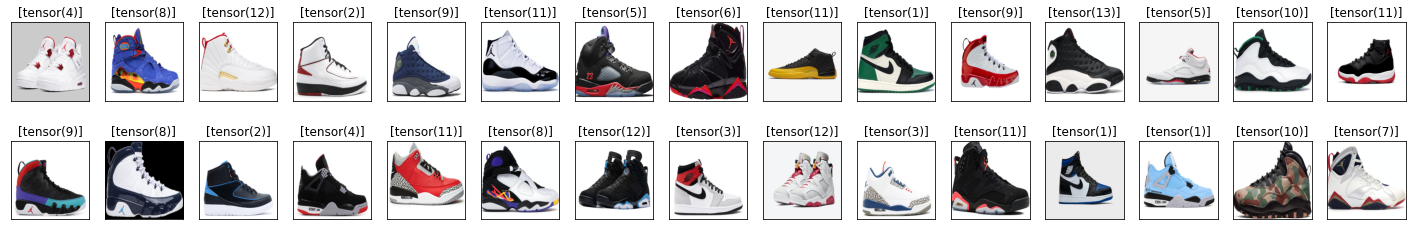

In [ ]:
dataiterP = iter(data_loaderP)

images, labels = dataiterP.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(30):
      ax = fig.add_subplot(2, 30/2, idx+1, xticks=[], yticks=[])
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      ax.set_title([labels[idx]])

Since these are unlabeled data, we have to get its accuracy manually based on what we know about each shoe when finding the data.

The model got 20 shoes correct and 10 shoes wrong giving it an accuracy of 67 % on unseen data.

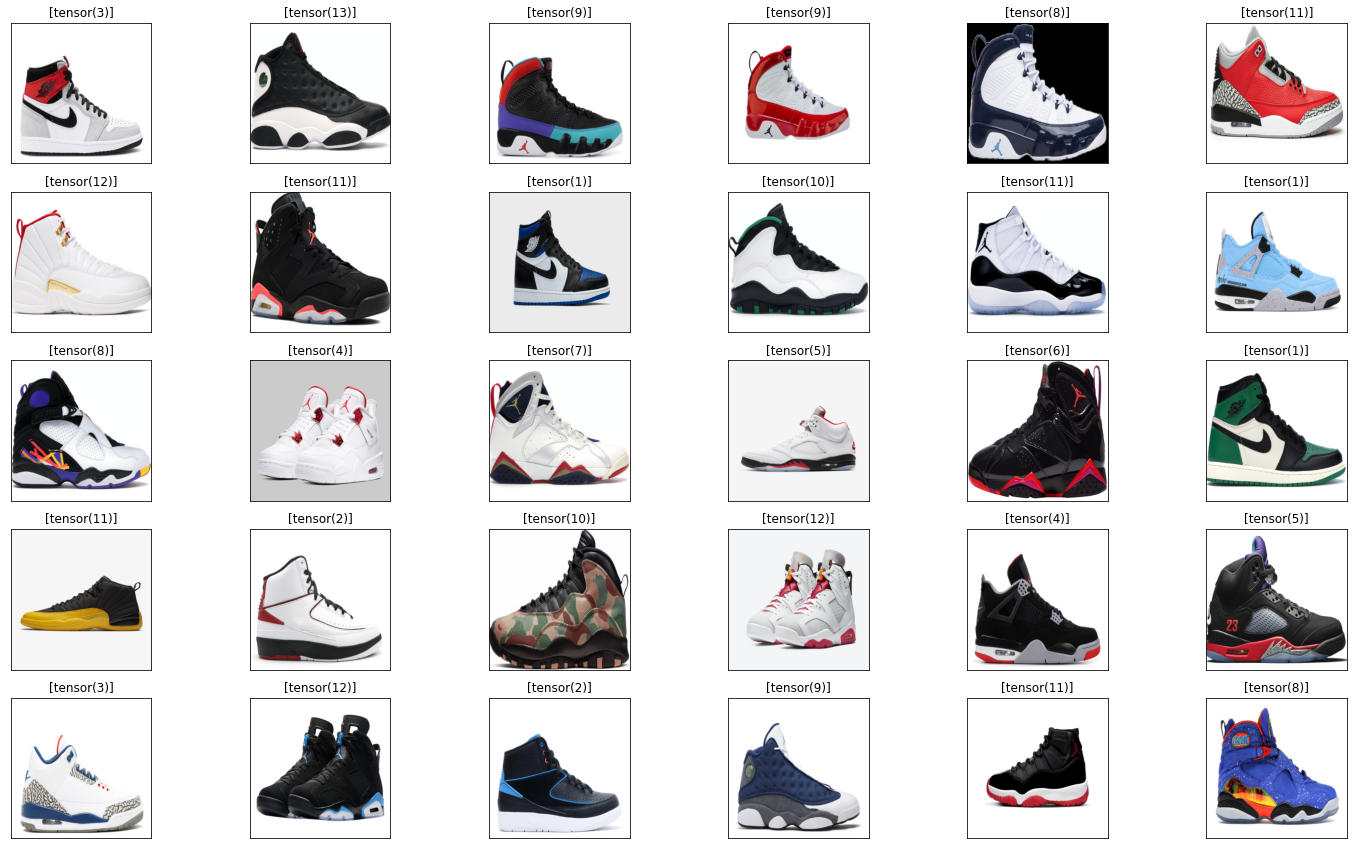

In [ ]:
#Getting better visual of image
dataiterP = iter(data_loaderP)

images, labels = dataiterP.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 15))
for idx in np.arange(30):
      ax = fig.add_subplot(5, 30/5, idx+1, xticks=[], yticks=[])
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      ax.set_title([labels[idx]])

#All labels shifted over 1

# Exploring what our Model does with non Jordan shoes.

The goal is to be able to pinpoint a threshold out value where we can definitevly say that our model is unable to identify it thus it is not a Jordan shoe.

In [ ]:
#Pred is not the index of the max number but the number itself
def what_jordan2(Resized_Tensor, model):
  #output = model(Resized_Tensor)
  
  Resized_Tensor = np.squeeze(Resized_Tensor)
  '''
  if torch.cuda.is_available():
    model=model.cuda()
    Resised_Tensor= Resized_Tensor.cuda()
  '''
  #print(Resized_Tensor.shape)
  output = model(Resized_Tensor[None, ...])
  print(output)

  #select index with maximum prediction score
  #pred = (output.max(1, keepdim=True)[1])
  pred = (output.max(1, keepdim=True)[0])
  #print(output[pred])
  #print(pred)
  return pred

In [ ]:
#These are all Jordan shoes
#Max number of the out tensor being returned
Michaelcpu= Michael.cpu()
x=0
for i in range(len(workingtestset)):
    #workingtestset[i][0]= (workingtestset[i][0]).cuda()
  print(what_jordan2(workingtestset[i][0], Michael).item())
  x+=1

tensor([[ 19.1412, -10.9614,   3.6210,   0.8685,   2.1251,   7.6197,  11.2154,
          -8.7549, -13.8018, -14.6417,  -0.7671,   1.9096,  -1.8337]],
       grad_fn=<AddmmBackward>)
19.141244888305664
tensor([[ 46.1527, -13.4928, -12.2601, -11.7187,  -6.0126,   2.4447, -18.0561,
         -21.1957, -24.7966,  -2.3186, -12.2789,   0.8840, -10.4115]],
       grad_fn=<AddmmBackward>)
46.152748107910156
tensor([[ 11.0232,   8.2670,  -1.0086,   4.8595, -16.4398,  -0.3664,   6.6364,
          -7.3796,  -7.0689,  -1.8449, -16.9375,  12.2479, -10.6404]],
       grad_fn=<AddmmBackward>)
12.2479248046875
tensor([[ -0.9355,  46.6645, -45.5774,   6.3337, -20.3778,   5.9618, -17.1290,
         -18.1832, -30.8385, -24.0538,   5.3915,   1.3495, -19.5570]],
       grad_fn=<AddmmBackward>)
46.66454315185547
tensor([[  6.7029, -11.3684, -15.6794,  12.7335, -13.9167,  -3.7797, -18.5534,
           1.7634,  -5.4647,  -0.7571, -13.5455,   5.4513, -11.3068]],
       grad_fn=<AddmmBackward>)
12.73351001739502

Non-Jordans

In [ ]:
yzy= process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/NOT JORDAN/Yeezy1.jpg')

In [ ]:
what_jordan2(yzy,Michael)

tensor([[-2.3467,  2.3572, -5.9963,  1.4096, -4.1578,  0.6683, -3.3061,  2.0945,
          2.4089,  3.5997, -0.7682, -2.2182, -6.9300]],
       grad_fn=<AddmmBackward>)


tensor([[3.5997]], grad_fn=<MaxBackward0>)

In [ ]:
adidas=process_image('//content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/NOT JORDAN/Adidas.jpg')

In [ ]:
what_jordan2(adidas,Michael)

tensor([[-2.8613, -0.7318, -4.1860, -1.7598, -6.2655,  7.8051,  3.1423,  5.3891,
         -4.3846, -3.0949,  0.7727, -1.2180,  1.1959]],
       grad_fn=<AddmmBackward>)


tensor([[7.8051]], grad_fn=<MaxBackward0>)

In [ ]:
nike1=process_image('//content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/NOT JORDAN/Nike1.jpeg')

In [ ]:
what_jordan2(nike1,Michael)

tensor([[ 2.3702, -6.4360,  3.0712, -0.6103, -3.5944, -4.8110, -2.5170,  6.2829,
          1.0689,  9.4204,  0.0651,  0.2779,  0.4413]],
       grad_fn=<AddmmBackward>)


tensor([[9.4204]], grad_fn=<MaxBackward0>)

In [ ]:
nikerun1=process_image('//content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/NOT JORDAN/Nikerun1.jpg')

In [ ]:
what_jordan2(nikerun1,Michael)

tensor([[ 5.2372, -1.7947, -1.3490, -4.9626, -3.1702, -0.3541, -0.9543, -1.4385,
          0.8109, -0.1064, -1.7550,  1.0355, -3.5933]],
       grad_fn=<AddmmBackward>)


tensor([[5.2372]], grad_fn=<MaxBackward0>)

In [ ]:
nikerun2=process_image('//content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/NOT JORDAN/Nikerun2.jpg')

In [ ]:
what_jordan2(nikerun2,Michael)

tensor([[-0.7129, -4.1706, -2.4440,  1.8946,  1.7061,  1.9451, -1.4717, -3.5006,
         -0.2054, -1.7503, -2.7392, -0.7042, -4.1211]],
       grad_fn=<AddmmBackward>)


tensor([[1.9451]], grad_fn=<MaxBackward0>)

In [ ]:
Stan=process_image('//content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/NOT JORDAN/StanSmith.jpg')

In [ ]:
what_jordan2(Stan,Michael)

tensor([[-0.9789, -3.8987, -1.4584,  1.9836,  2.3167, -1.6992, -4.2641, -2.6180,
         -3.5074,  0.3097,  3.5465, -4.6861,  1.5723]],
       grad_fn=<AddmmBackward>)


tensor([[3.5465]], grad_fn=<MaxBackward0>)

In [ ]:
N97=process_image('//content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/NOT JORDAN/nike97.jpg')

In [ ]:
what_jordan2(N97,Michael)

tensor([[-3.4040, -1.4332,  2.1695, -5.0082,  3.0812, -2.4971, -0.7996, -0.2601,
         -0.4767,  1.2084, -3.6583, -2.5554, -1.7966]],
       grad_fn=<AddmmBackward>)


tensor([[3.0812]], grad_fn=<MaxBackward0>)

## Jordan Predictor:

The next step was to create a function that takes a fully unprocessed image, processes it and then be able to return a prediction using the Machine Learning model that we had built.

In [ ]:
def process_image(image_path):
    # Load Image
    
    img = Image.open(image_path)
    
    J_transform = transforms.Compose([transforms.Resize((600,600),interpolation=2),
                                           transforms.ToTensor()])
    
    img= J_transform(img)

    #Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis,:]

    
    return img

In [ ]:
def show_image(image, pred):
    # Convert image to numpy
    image = image.numpy()
    #print(image.size)
    # Print the image
    fig = plt.figure(figsize=(25, 4))
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    plt.imshow(np.transpose(image[0], (1, 2, 0)))
    
    ax.set_title(pred)

In [ ]:
#Trying to output both the inputted picture and the picture of MJ side by side
def show_images(image, pred):
    # Convert image to numpy

  images = (image.numpy, JordanDescription(pred=pred,des=False).numpy)
  #images = images.numpy() # convert images to numpy for display

  # plot the images in the batch, along with the corresponding labels
  fig = plt.figure(figsize=(25, 4))
  for idx in np.arange(2):
        ax = fig.add_subplot(1, 2/1, idx+1, xticks=[], yticks=[])
        plt.imshow(np.transpose(images[idx], (1, 2, 0)))
        ax.set_title(pred)
  

ValueError: ignored

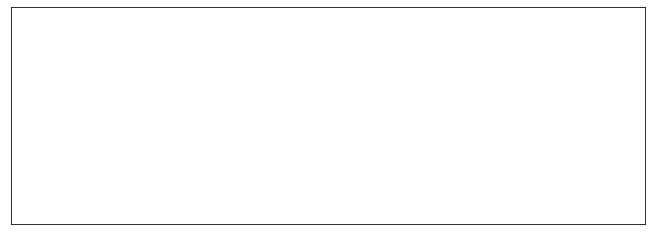

In [ ]:
show_images(process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ1.jpg'),1)

In [ ]:
def JordanDescription(pred,des=True):
  if pred==1:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ1.jpg')
    description= 'Shoe Model: Air Jordan I (1)\nOriginal Release Date: 1985\nOriginal Price: $65\nDesigner: Peter Moore\nPopular Jordan I Colourways: Chicago, Black Toe, Royal, UNC, Shattered Backboard'
  elif pred==2:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ2.jpg')
    description= 'Shoe Model: Air Jordan II (2)\nOriginal Release Date: 1986\nOriginal Price: $100\nDesigner: Bruce Kilgore\nPopular Jordan II Colourways: Varsity Red, Doernbecher, Melo, BHM, Wing It'
  elif pred==3:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ3.jpg')
    description= 'Shoe Model: Air Jordan III (3)\nOriginal Release Date: 1988\nOriginal Price: $100\nDesigner: Tinker Hatfield\nPopular Jordan III Colourways: Black Cement, White Cement, True Blue, Mocha, Hall of Fame'
  elif pred==4:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ4.jpg')
    description= 'Shoe Model: Air Jordan IV (4)\nOriginal Release Date: 1989\nOriginal Price: $110\nDesigner: Tinker Hatfield\nPopular Jordan IV Colourways: Fire Red, Black Cat, Bred, Raptors, Cactus Jack'
  elif pred==5:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ5.jpg')
    description= 'Shoe Model: Air Jordan V (5)\nOriginal Release Date: 1990\nOriginal Price: $125\nDesigner: Tinker Hatfield\nPopular Jordan V Colourways: Bel-Air, Fire-Red, Grape, Tokyo, Laney'
  elif pred==6:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ6.jpg')
    description= 'Shoe Model: Air Jordan VI (6)\nOriginal Release Date: 1991\nOriginal Price: $125\nDesigner: Tinker Hatfield\nPopular Jordan VI Colourways: Infrared, Carmine, Sport Blue, Like Mike, Champagne'
  elif pred==7:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ7.jpg')
    description= 'Shoe Model: Air Jordan VII (7)\nOriginal Release Date: 1992\nOriginal Price: $125\nDesigner: Tinker Hatfield\nPopular Jordan VII Colourways: Raptors, Olympic, Hare, Bordeaux, French Blue'
  elif pred==8:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ8.jpg')
    description= 'Shoe Model: Air Jordan VIII (8)\nOriginal Release Date: 1993\nOriginal Price: $125\nDesigner: Tinker Hatfield\nPopular Jordan VIII Colourways: Playoffs, Bugs Bunny, Aqua, OVO, Three Time’s A Charm'
  elif pred==9:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ9.jpg')
    description= 'Shoe Model: Air Jordan IX (9)\nOriginal Release Date: 1993\nOriginal Price: $125\nDesigner: Tinker Hatfield\nPopular Jordan IX Colourways: Powder Blue, Charcoal, Olive, Doernbecher, Barons'
  elif pred==10:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ10.jpg')
    description= 'Shoe Model: Air Jordan X (10)\nOriginal Release Date: 1994\nOriginal Price: $125\nDesigner: Tinker Hatfield\nPopular Jordan X Colourways: Chicago, Cool Grey, Double Nickel, OVO, Retro Steel'
  elif pred==11:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ11.jpg')
    description= 'Shoe Model: Air Jordan XI (11)\nOriginal Release Date: 1995\nOriginal Price: $125\nDesigner: Tinker Hatfield\nPopular Jordan XI Colourways: Concord, Bred, Space Jam, Gamma, 72-10'
  elif pred==12:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ12.jpg')
    description= 'Shoe Model: Air Jordan XII (12)\nOriginal Release Date: 1996\nOriginal Price: $135\nDesigner: Tinker Hatfield\nPopular Jordan XII Colourways: Flu Game, Taxi, French Blue, UNC, Cherry'
  elif pred==13:
    Jimage=process_image('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/Air Jordan Description Pictures/AJ13.jpg')
    description= 'Shoe Model: Air Jordan XIII (13)\nOriginal Release Date: 1997\nOriginal Price: $150\nDesigner: Tinker Hatfield\nPopular Jordan XIII Colourways: Black Cat, Bred, Flint, Grey Toe, He Got Game'

  if des==True:
    print(description)
  #Jimage is a tensor that will then be passed into show_images

  return Jimage

JordanPredictor function also uses the 'what_jordan' function that was created in the section above ('Testing on never seen before data'). Its code has not been included again in this section.

In [ ]:
def JordanPredictor(ImagePath, model):
  #output = model(Resized_Tensor)
  Resized_Tensor = process_image(ImagePath)
  
  #Resized_Tensor = np.squeeze(Resized_Tensor)
  '''
  if torch.cuda.is_available():
    model=model.cuda()
    Resised_Tensor= Resized_Tensor.cuda()
  '''
  #print(Resized_Tensor.shape)
  prediction = what_jordan(Resized_Tensor=Resized_Tensor, model=model)

  show_image(Resized_Tensor, prediction)

  Classification= "The Jordan Machine Learning Model predicts that this shoe is a Jordan " + str(prediction)
  return Classification

In [ ]:
#JordanPredictor1 differs from JordanPredictor in that it also outputs a brief 
#description of the shoe and a picture of Michael Jordan wearing it

def JordanPredictor1(ImagePath, model):
  #output = model(Resized_Tensor)
  Resized_Tensor = process_image(ImagePath)
  
  #Resized_Tensor = np.squeeze(Resized_Tensor)
  '''
  if torch.cuda.is_available():
    model=model.cuda()
    Resised_Tensor= Resized_Tensor.cuda()
  '''
  #print(Resized_Tensor.shape)
  prediction = what_jordan(Resized_Tensor=Resized_Tensor, model=model)
  Classification= "The Jordan Machine Learning Model predicts that this shoe is a Jordan " + str(prediction)+'\n'
  print(Classification)
  show_image(Resized_Tensor, prediction)
  show_image(JordanDescription(prediction,des=True), prediction)

  void=''
  return void

The Jordan Machine Learning Model predicts that this shoe is a Jordan 8


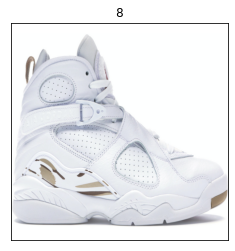

In [ ]:
print(JordanPredictor('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/SHOES/jordan8.jpg', Michael))

The Jordan Machine Learning Model predicts that this shoe is a Jordan 6

Shoe Model: Air Jordan VI (6)
Original Release Date: 1991
Original Price: $125
Designer: Tinker Hatfield
Popular Jordan VI Colourways: Infrared, Carmine, Sport Blue, Like Mike, Champagne
This good



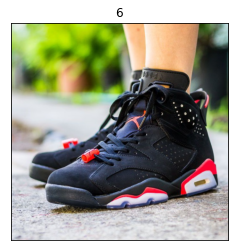

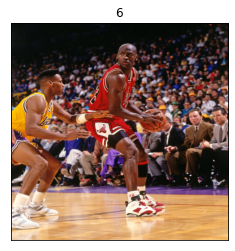

In [ ]:
print(JordanPredictor1('/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/SHOES/jordan6.jpg', Michael))